In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv("../datasets/clean_train.csv")

In [3]:
train.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,544,531379050,60,RL,43.0,11492.0,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
1,153,535304180,20,RL,68.0,7922.0,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
2,318,916386060,60,RL,73.0,9802.0,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
3,255,906425045,50,RL,82.0,14235.0,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
4,138,535126040,20,RL,137.0,16492.0,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000


In [4]:
train.shape

(1721, 81)

## EDA

In [5]:
train.corr()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_price
id,1.000000,0.173485,0.015456,-0.024967,0.018465,-0.069741,-0.020962,-0.065913,-0.094985,-0.032154,...,-0.012638,-0.005978,0.033537,-0.022792,0.016624,0.049795,-0.009640,0.140985,-0.976372,-0.061647
pid,0.173485,1.000000,-0.006349,-0.091291,-0.021311,-0.288721,0.130408,-0.364393,-0.191652,-0.281462,...,-0.072713,-0.074609,0.160374,-0.024480,-0.056676,-0.005246,0.009145,-0.033133,0.007859,-0.283375
ms_subclass,0.015456,-0.006349,1.000000,-0.389790,-0.296719,0.011651,-0.063895,0.010905,0.017194,-0.001162,...,-0.004984,-0.020541,-0.037645,-0.018350,-0.038781,-0.012159,-0.034415,0.008812,-0.022955,-0.103003
lot_frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
lot_area,0.018465,-0.021311,-0.296719,0.574024,1.000000,0.180567,-0.055611,0.091395,0.094355,0.186518,...,0.221224,0.182895,-0.009939,0.005775,0.113080,0.171538,0.122788,0.013816,-0.023959,0.381088
overall_qual,-0.069741,-0.288721,0.011651,0.194808,0.180567,1.000000,-0.105682,0.615418,0.596232,0.462496,...,0.275888,0.320260,-0.182977,0.024548,0.058073,0.008749,0.030854,0.015068,-0.009044,0.812155
overall_cond,-0.020962,0.130408,-0.063895,-0.054455,-0.055611,-0.105682,1.000000,-0.386029,0.031404,-0.151850,...,-0.000535,-0.060395,0.116333,-0.007300,0.052660,-0.022058,0.012167,-0.014448,0.046443,-0.123535
year_built,-0.065913,-0.364393,0.010905,0.109504,0.091395,0.615418,-0.386029,1.000000,0.629263,0.354214,...,0.220322,0.214174,-0.396886,0.017745,-0.039562,0.008083,-0.001446,-0.007316,-0.005179,0.580513
year_remod/add,-0.094985,-0.191652,0.017194,0.085052,0.094355,0.596232,0.031404,0.629263,1.000000,0.235157,...,0.227057,0.282711,-0.245237,0.030417,-0.038757,-0.016995,-0.004392,0.014085,0.042990,0.558032
mas_vnr_area,-0.032154,-0.281462,-0.001162,0.218218,0.186518,0.462496,-0.151850,0.354214,0.235157,1.000000,...,0.188374,0.155122,-0.120019,0.010817,0.092804,0.022525,0.093645,0.005888,-0.029574,0.540572


In [6]:
train.corr()[["sale_price"]]

,sale_price
id,-0.061647
pid,-0.283375
ms_subclass,-0.103003
lot_frontage,0.341842
lot_area,0.381088
overall_qual,0.812155
overall_cond,-0.123535
year_built,0.580513
year_remod/add,0.558032
mas_vnr_area,0.540572


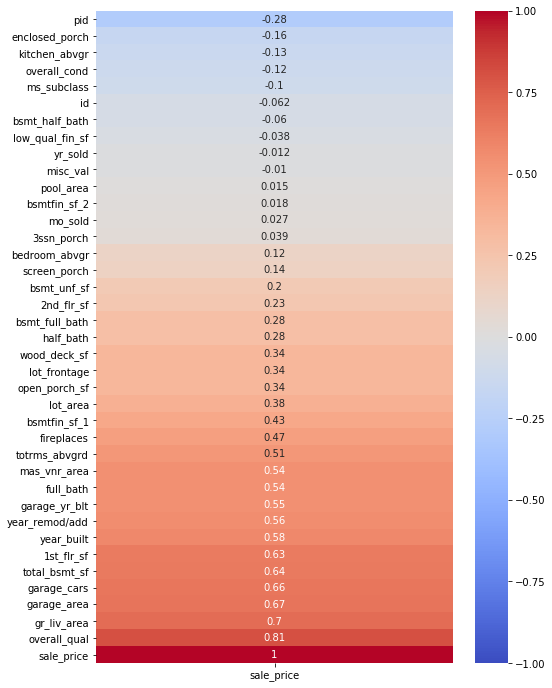

In [7]:
# Heatmap - credit Riley from lecture
plt.figure(figsize=(8, 12))

sns.heatmap(train.corr()[["sale_price"]].sort_values("sale_price"),
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1);


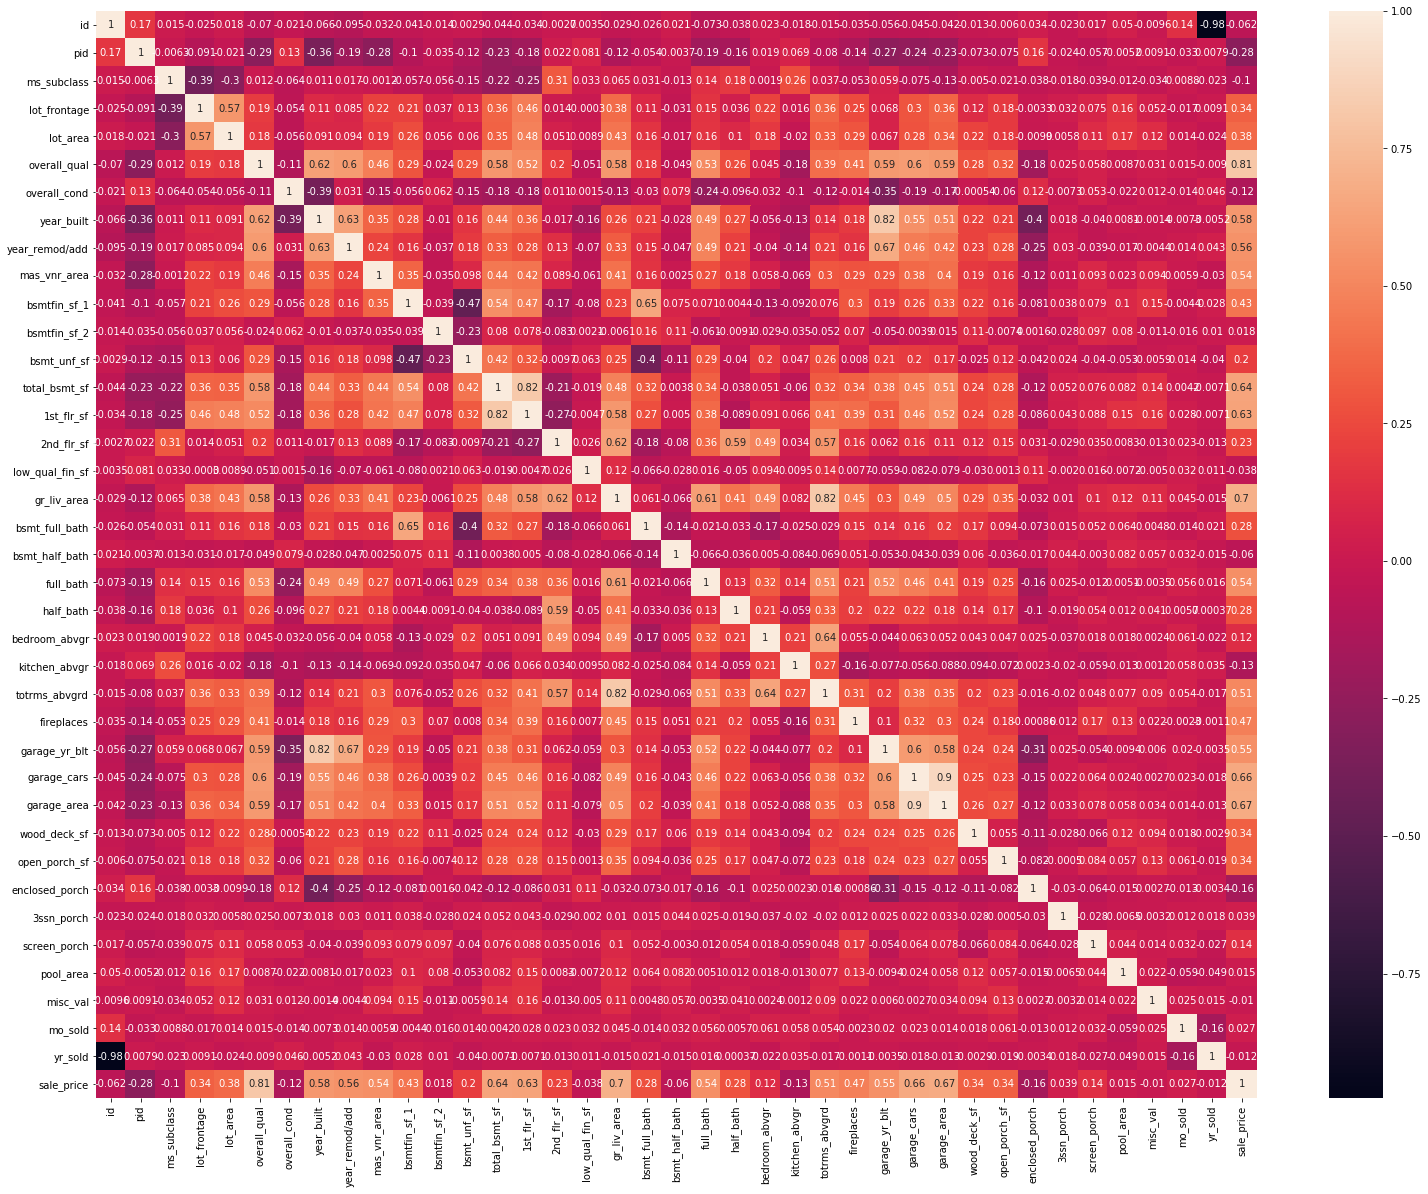

In [13]:
plt.figure(figsize=(26, 20))

sns.heatmap(train.corr(),
            annot=True);

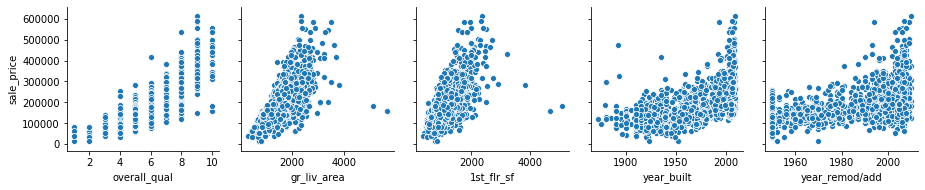

In [37]:
# Pairplots of the top 5 highest corr from heatmap above (less bsmt and garage cols):
sns.pairplot(train,
             x_vars=["overall_qual",
                     "gr_liv_area",
                     "1st_flr_sf",
                     "year_built",
                     "year_remod/add"],
             y_vars=["sale_price"]);

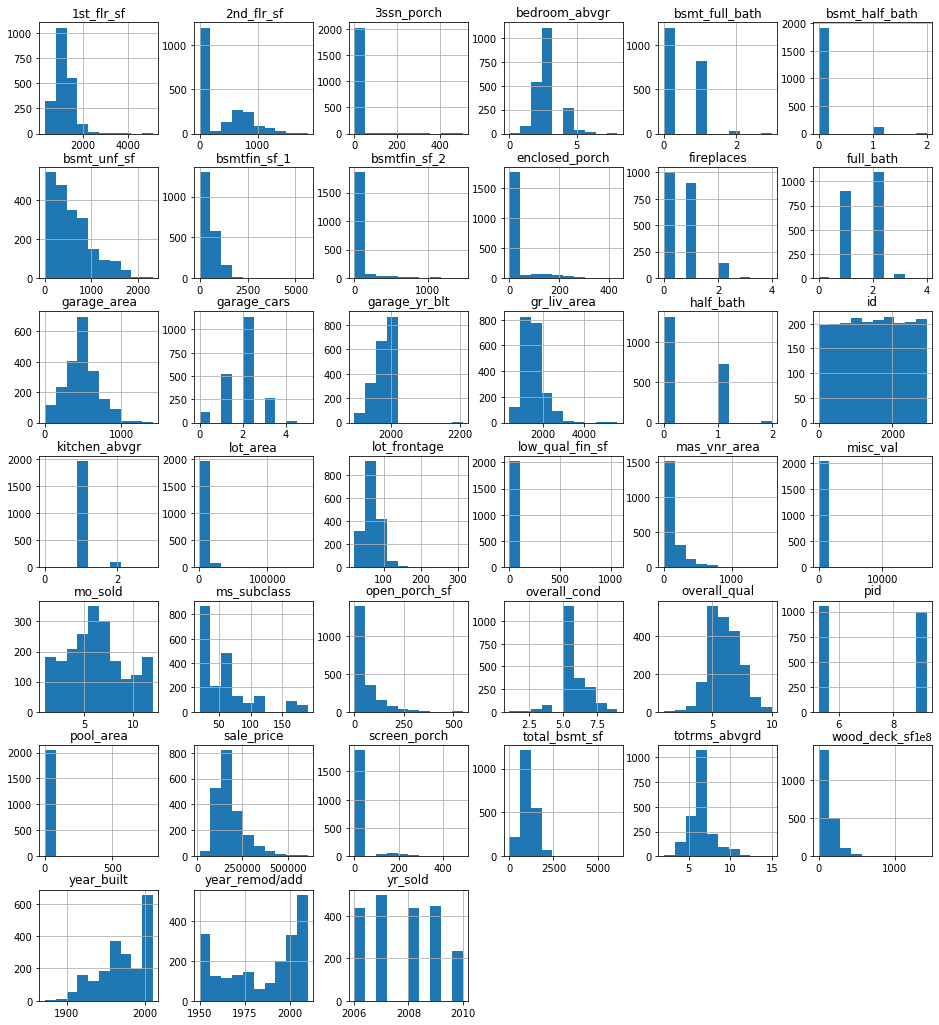

In [38]:
# Dist plots of all numeric:
train.hist(figsize=(16, 18));

### Boxplots: Checking for outliers

***Overall Quality of the House***
- One outlier on the left/ min side

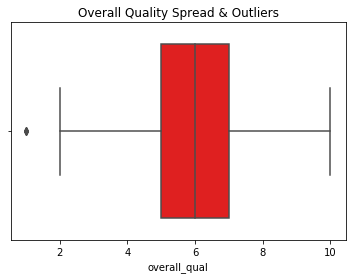

In [39]:
sns.boxplot(train["overall_qual"],
            color="red")

plt.title("Overall Quality Spread & Outliers");

In [40]:
# Outliers:
train["overall_qual"].min()

1

In [41]:
train["overall_qual"].describe()

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

In [44]:
q1 = np.percentile(train["overall_qual"], 25)
q3 = np.percentile(train["overall_qual"], 75)
IQR = q3 - q1
IQR

2.0

***Above Ground Living Area***
- Many outliers on the right.

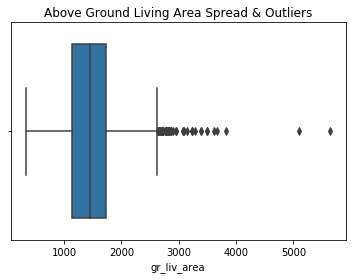

In [477]:
sns.boxplot(train["gr_liv_area"])

plt.title("Above Ground Living Area Spread & Outliers");

In [45]:
train["gr_liv_area"].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: gr_liv_area, dtype: float64

***1 Floot Square Feet***
- Many outliers on the right of the plot

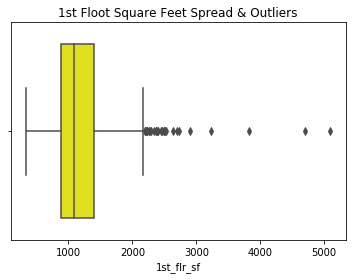

In [46]:
sns.boxplot(train["1st_flr_sf"],
            color="yellow")
plt.title("1st Floot Square Feet Spread & Outliers");

In [47]:
train["1st_flr_sf"].describe()

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st_flr_sf, dtype: float64

***Year Built of Unit***
- A handful of outliers on the left of the boxplot

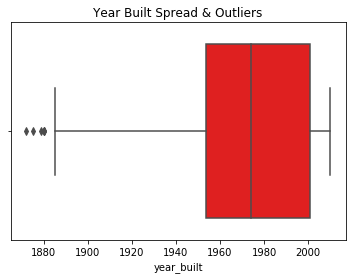

In [48]:
sns.boxplot(train["year_built"],
            color="red")

plt.title("Year Built Spread & Outliers");

In [49]:
train["year_built"].describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

***Addition / Remodel Year***
- No outliers, all data explained in the boxplot above
- A new feature column of the age of the addition/remodel would be good

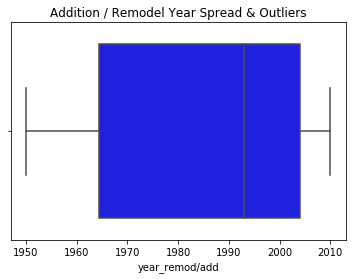

In [50]:
sns.boxplot(train["year_remod/add"],
            color="blue")

plt.title("Addition / Remodel Year Spread & Outliers");

In [51]:
train["year_remod/add"].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: year_remod/add, dtype: float64

# Feature Engineering

### Create Age Columns.

Columns:
- Year Built
- Year Remod/Addition

### Features for X: